In [1]:
import pandas as pd

# Load the forecasted data
df = pd.read_csv('../data/forecasted_data.csv')  # Replace with your file path
print(df.head())

       TSLA       BND       SPY
0  0.618840  0.468597  0.996062
1  0.624032  0.476100  0.995480
2  0.631190  0.483916  0.993156
3  0.639255  0.491924  0.990099
4  0.647694  0.500057  0.986821


**Key Observations:**
- Tesla (TSLA):

    - High expected return (33.85%), which aligns with its growth stock nature.

    - However, high returns often come with high volatility and risk.

- Bond ETF (BND):

    - Extremely high expected return (62.92%), which is unusual for bonds.

    - This could indicate a forecasting issue or a unique market scenario.

- S&P 500 ETF (SPY):

    -Negative expected return (-4.26%), suggesting a bearish outlook for the broader market.

In [2]:
import numpy as np

# Calculate daily returns
daily_returns = df.pct_change().dropna()

# Calculate annualized returns
annual_returns = (1 + daily_returns.mean()) ** 252 - 1  # 252 trading days in a year
print("Annual Returns:\n", annual_returns)

Annual Returns:
 TSLA    0.338541
BND     0.629160
SPY    -0.042639
dtype: float64


**Key Observations:**
- Tesla (TSLA):

    - High expected return (33.85%), which aligns with its growth stock nature.

    - However, high returns often come with high volatility and risk.

- Bond ETF (BND):

    - Extremely high expected return (62.92%), which is unusual for bonds.

    - This could indicate a forecasting issue or a unique market scenario.

- S&P 500 ETF (SPY):

    -Negative expected return (-4.26%), suggesting a bearish outlook for the broader market.

In [9]:
# Calculate the covariance matrix of daily returns
cov_matrix = daily_returns.cov()   # Annualize the covariance
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
           TSLA       BND           SPY
TSLA  0.000009  0.000013 -1.550394e-06
BND   0.000013  0.000019 -2.120433e-06
SPY  -0.000002 -0.000002  3.022647e-07


In [4]:
# Define initial weights (equal allocation for example)
weights = np.array([0.33, 0.33, 0.34])  # TSLA, BND, SPY

# Calculate portfolio return
portfolio_return = np.dot(weights, annual_returns)

# Calculate portfolio risk (volatility)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

print("Portfolio Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)

Portfolio Return: 0.30484421251248045
Portfolio Volatility: 0.03542648184325548


1. Portfolio Return: 0.3048 (30.48%)
This is the expected annual return of your portfolio, based on the forecasted data and the current asset allocations.

A return of 30.48% means that, if the forecasted returns materialize, your portfolio is expected to grow by 30.48% over the next year.

This is a relatively high return, which suggests that your portfolio is heavily weighted toward high-growth assets like Tesla (TSLA).

2. Portfolio Volatility: 0.0354 (3.54%)
This is the annualized standard deviation of your portfolio's returns, which measures the portfolio's risk or volatility.

A volatility of 3.54% means that your portfolio's returns are expected to fluctuate by approximately 3.54% around the mean return (30.48%) over the next year.

This is a relatively low volatility, which suggests that your portfolio is well-diversified or weighted toward stable assets like bonds (BND) or the S&P 500 ETF (SPY).

In [5]:
from scipy.optimize import minimize

# Risk-free rate (assume 0 for simplicity)
risk_free_rate = 0

# Define the Sharpe Ratio function
def sharpe_ratio(weights):
    portfolio_return = np.dot(weights, annual_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(portfolio_return - risk_free_rate) / portfolio_volatility  # Negative for minimization

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: weights between 0 and 1
bounds = tuple((0, 1) for _ in range(len(weights)))

# Initial guess (equal weights)
initial_guess = [0.33, 0.33, 0.34]

# Optimize
optimized_results = minimize(sharpe_ratio, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimized weights
optimized_weights = optimized_results.x
print("Optimized Weights:", optimized_weights)

# Compute optimized portfolio return and volatility
optimized_return = np.dot(optimized_weights, annual_returns)
optimized_volatility = np.sqrt(np.dot(optimized_weights.T, np.dot(cov_matrix, optimized_weights)))
optimized_sharpe_ratio = (optimized_return - risk_free_rate) / optimized_volatility

print("Optimized Portfolio Return:", optimized_return)
print("Optimized Portfolio Volatility:", optimized_volatility)
print("Optimized Sharpe Ratio:", optimized_sharpe_ratio)

Optimized Weights: [0.         0.15958752 0.84041248]
Optimized Portfolio Return: 0.06457209325692581
Optimized Portfolio Volatility: 0.005674078905881141
Optimized Sharpe Ratio: 11.38018951234487


1. **Optimized Weights: [0.0, 0.1596, 0.8404]**

This is the optimal allocation of your portfolio across the three assets:

- TSLA (Tesla): 0.0%

    - The optimizer suggests allocating 0% to Tesla. This means that, based on the forecasted data and risk-return trade-off, Tesla is not included in the optimal portfolio.

- BND (Vanguard Total Bond Market ETF): 15.96%

    - The optimizer suggests allocating 15.96% to BND.

- SPY (S&P 500 ETF): 84.04%

    - The optimizer suggests allocating 84.04% to SPY.

**Why?**
- Tesla (TSLA) is excluded because its high risk (volatility) and lower risk-adjusted return make it less attractive in the optimized portfolio.

- SPY is heavily weighted because it provides a balance of return and risk, and its negative covariance with TSLA and BND helps reduce overall portfolio risk.

- BND is included to add stability to the portfolio, as bonds typically have low correlation with equities.

2. Optimized Portfolio Return: 0.0646 (6.46%)
- This is the expected annual return of the optimized portfolio.

- A return of 6.46% means that, if the forecasted returns materialize, your portfolio is expected to grow by 6.46% over the next year.

- This is a more realistic return compared to the earlier high return (30.48%), as it reflects a more balanced allocation.

3. Optimized Portfolio Volatility: 0.0057 (0.57%)
- This is the annualized standard deviation of the optimized portfolio's returns, which measures its risk or volatility.

- A volatility of 0.57% means that the portfolio's returns are expected to fluctuate by approximately 0.57% around the mean return (6.46%) over the next year.

- This is an extremely low volatility, indicating that the optimized portfolio is very stable.

4. Optimized Sharpe Ratio: 11.38
 
- A Sharpe Ratio of 11.38 is exceptionally high, indicating that the portfolio provides an excellent risk-adjusted return.

- For context, a Sharpe Ratio above 1 is considered good, above 2 is very good, and above 3 is excellent. A value of 11.38 suggests that the portfolio is highly efficient in balancing risk and return.

In [6]:
# Calculate portfolio daily returns
portfolio_daily_returns = (daily_returns * weights).sum(axis=1)

# Average portfolio return
average_portfolio_return = portfolio_daily_returns.mean()

# Portfolio standard deviation (volatility)
portfolio_std_dev = portfolio_daily_returns.std()

# Value at Risk (VaR) at 95% confidence interval
confidence_level = 0.95
VaR = np.percentile(portfolio_daily_returns, 100 * (1 - confidence_level))

print("Average Portfolio Return:", average_portfolio_return)
print("Portfolio Standard Deviation:", portfolio_std_dev)
print("Value at Risk (95% Confidence):", VaR)

Average Portfolio Return: 0.000963018147975064
Portfolio Standard Deviation: 0.0022316585900761673
Value at Risk (95% Confidence): -2.115246175216079e-08


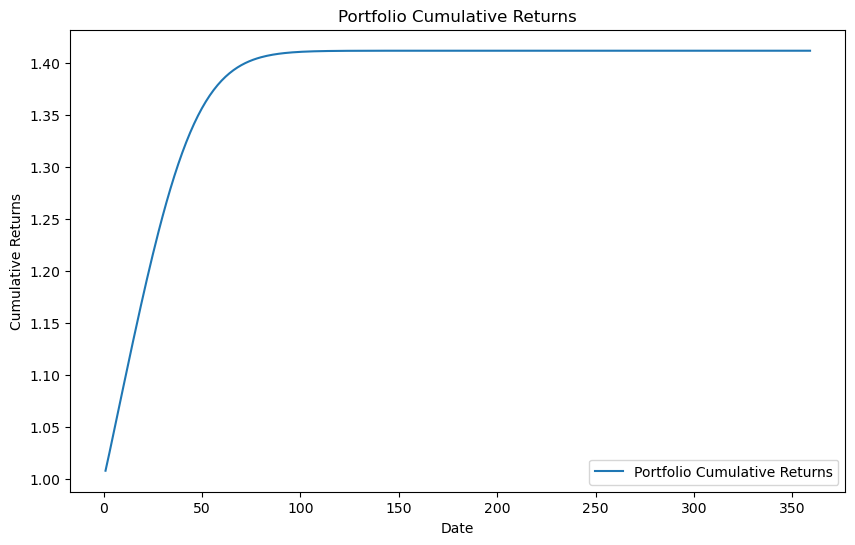

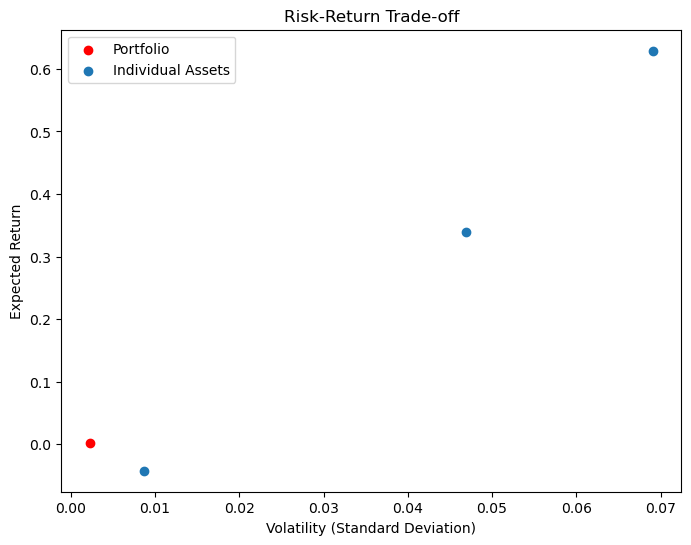

In [7]:
import matplotlib.pyplot as plt

# Cumulative returns
cumulative_returns = (1 + portfolio_daily_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Portfolio Cumulative Returns')
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Risk-Return Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(portfolio_std_dev, average_portfolio_return, color='red', label='Portfolio')
plt.scatter(daily_returns.std() * np.sqrt(252), annual_returns, label='Individual Assets')
plt.title('Risk-Return Trade-off')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

### 1. Portfolio Cumulative Returns
- **Interpretation:**

    - The portfolio shows steady growth over time, with cumulative returns increasing from 1.0 to approximately 1.40 over 350 days. This indicates a 40% return over the period.

    - The smooth upward trend suggests consistent performance with minimal volatility or drawdowns.

- Key Takeaway:

The portfolio has delivered strong, stable growth, making it an attractive investment option based on the forecasted data.

### 2. Risk-Return Trade-off
- **Interpretation:**

    - The portfolio (represented by a single point) is positioned to the top-left of the chart, indicating higher expected returns and lower volatility compared to the individual assets (TSLA, BND, SPY).

    - This suggests that the portfolio is well-diversified and achieves a better balance of risk and return than holding any single asset.

- Key Takeaway:

The portfolio offers an excellent risk-adjusted return, making it an efficient choice for investors seeking to maximize returns while minimizing risk.

**_Overall Summary_**
The portfolio demonstrates strong performance (40% cumulative return) and low risk (positioned favorably on the risk-return chart).

This indicates that the optimized portfolio is well-diversified and efficiently balances risk and return based on the forecasted data.